<b>Reading the data using pandas</b>

In [1]:
# conventional way to import pandas
import pandas as pd

In [2]:
# read the CSV file directly from a URL and save the results
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)

# display the first five rows
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
# display the last five rows
data.tail()

,TV,radio,newspaper,sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [4]:
# check the shape of the datafram (rows and columns)
data.shape

(200, 4)

<b>Visualizing the data using seaborn</b>

In [5]:
# conventional way to import seaborn
import seaborn as sns

# installation command - conda install seabron

# allow plots to appear within the notebook
%matplotlib inline

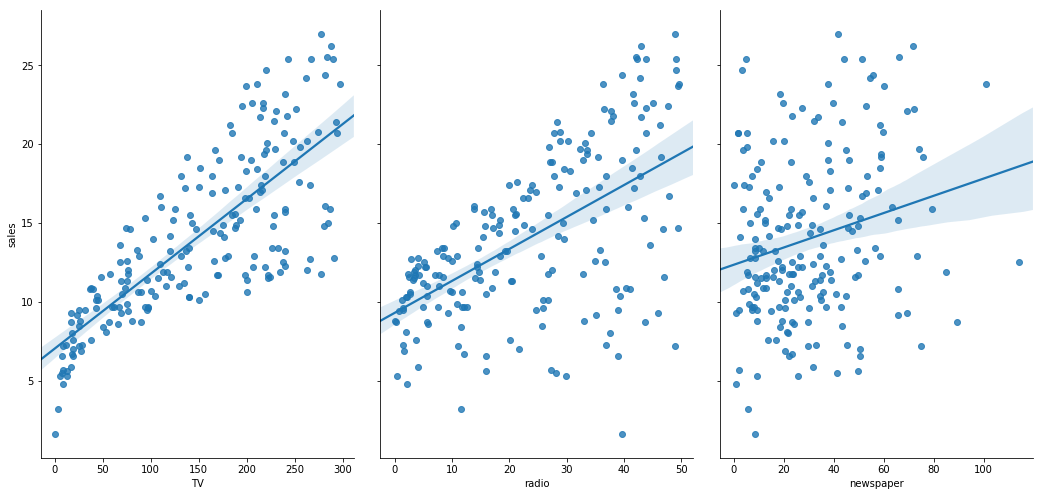

In [6]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(data, x_vars=['TV', 'radio', 'newspaper'], y_vars = 'sales', size=7, aspect=0.7, kind='reg')

<b>Machine Learning Steps - preparing X and y using pandas</b>

In [8]:
# create a python list of feature names
feature_cols = ['TV', 'radio', 'newspaper']

# use the list to select a subset of original dataframe
X = data[feature_cols]

# equivalent in-line command
X = data[['TV', 'radio', 'newspaper']]

# print the first five rows
X.head()

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [9]:
# check the type and shape of X
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 3)


In [10]:
# select a series from the dataframe
y = data['sales']

# print the first 5 values
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: sales, dtype: float64

In [15]:
# check the type and shape of y
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(200,)


<b>Splitting X and y into training and testing sets</b>

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

In [14]:
# the default split is 75% training and 25% testing
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 3)
(50, 3)
(150,)
(50,)


<b>1. Linear Regression</b>

In [16]:
# import the model
from sklearn.linear_model import LinearRegression

# instantiate the object
linreg = LinearRegression()

# fit the model training set
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
# Interpreting the model cofficients(theta(i)) and intercept(theta(0))
print(linreg.intercept_)
print(linreg.coef_)

2.8769666223179318
[0.04656457 0.17915812 0.00345046]


In [18]:
# pair the feature names with the coefficients
print(list(zip(feature_cols, linreg.coef_)))

[('TV', 0.046564567874150295), ('radio', 0.1791581224508883), ('newspaper', 0.0034504647111804065)]


In [19]:
# make predictions on the test dataset
y_pred = linreg.predict(X_test)

<b>Calculate the model evaluation metrics for regression:</b>
- MAE
- MSE
- RMSE

In [21]:
# Sample Example
# Choose some hypothetical true and predicted value set
true = [100, 50, 30, 20]
pred = [90, 50, 50, 30]

In [23]:
# calculate MAE manually and also via built-in scikit-learn functionality

# Manual
sum = 0.0
for i in range(len(true)):
    sum += abs(true[i] - pred[i])
print(sum/len(true))

# scikit-learn
from sklearn import metrics
print(metrics.mean_absolute_error(true, pred))

10.0
10.0


In [24]:
# calculate MSE manually and also via built-in scikit-learn functionality

# Manual
sum = 0.0
for i in range(len(true)):
    sum += (true[i] - pred[i])**2
print(sum/len(true))

# scikit-learn
# from sklearn import metrics
print(metrics.mean_squared_error(true, pred))

150.0
150.0


In [27]:
# calculate RMSE manually and also via built-in scikit-learn functionality
import numpy as np

# Manual
sum = 0.0
for i in range(len(true)):
    sum += (true[i] - pred[i])**2
print(np.sqrt(sum/len(true)))

# scikit-learn
# from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(true, pred)))

12.24744871391589
12.24744871391589


Compute RMSE for the problem at hand (Sales Predictions)

In [29]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.404651423032896


<B>Feature Selection</B>
- features with a weak correlation with the data can cause RMSe to go up
- in our example, 'newepaper' seems to be a similar feature
- removing it may reduce RMSE:

In [30]:
# Step1: read the csv file from the source
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)

# create a Python list of features without 'newspaper'
feature_cols = ['TV', 'radio']

# use the list to select the subset of original dataframe
X = data[feature_cols]

# select the response/series y from the dataframe
y = data['sales']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# fit the model to the training set
linreg.fit(X_train, y_train)

# make predictions on the testing set
y_pred = linreg.predict(X_test)

# compute the RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.3879034699382888


Upon removing the 'newspaper' as a feature, the RMSE has reduced.